# Build CNN Model for classification of Flowers

1)Download Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2)Image Augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

## Load Data

In [3]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Data/Flowers/flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Data/Flowers/flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4317 images belonging to 5 classes.


In [44]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [45]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# 3)Create Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
model=Sequential()

# 4)Add Layers



a)Convolution Layer




In [8]:
model.add(Convolution2D(32,(3,3),kernel_initializer="random_uniform",activation="relu",strides=(1,1),input_shape=(64,64,3)))

b)MaxPooling Layer

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

c)Flatten

In [10]:
model.add(Flatten())

d)Dense(Hidden layer)

In [11]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

e)Output layer

In [12]:
model.add(Dense(5,activation="softmax"))

# 5)Compile the model

In [13]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

# 6)Fit the model

In [46]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 613s 3s/step - loss: 1.1807 - accuracy: 0.5071 - val_loss: 1.0645 - val_accuracy: 0.5698
Epoch 2/5
180/180 [==============================] - 67s 375ms/step - loss: 1.0647 - accuracy: 0.5726 - val_loss: 1.0555 - val_accuracy: 0.5837
Epoch 3/5
180/180 [==============================] - 68s 377ms/step - loss: 1.0042 - accuracy: 0.6013 - val_loss: 0.9352 - val_accuracy: 0.6391
Epoch 4/5
180/180 [==============================] - 66s 368ms/step - loss: 0.9319 - accuracy: 0.6379 - val_loss: 0.9133 - val_accuracy: 0.6530
Epoch 5/5
180/180 [==============================] - 66s 370ms/step - loss: 0.8710 - accuracy: 0.6606 - val_loss: 0.9661 - val_accuracy: 0.6375


# 7)Save the model

In [15]:
model.save("Flowers.h5")

# 8)Test the model

In [40]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model("Flowers.h5")
img=image.load_img(r"/content/drive/MyDrive/Data/Flowers/flowers/sunflower/1008566138_6927679c8a.jpg",target_size=(64,64))

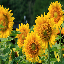

In [41]:
img

In [24]:
x=image.img_to_array(img)

In [25]:
x=np.expand_dims(x,axis=0)

In [26]:
pred=model.predict(x)

In [27]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [42]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [43]:
index[np.argmax(pred)]

'sunflower'